# Lesson 10: Debugging Code

Read these notes then try to debug the Task code at the bottom.

These notes will be useful to help you debug your own code in your projects.

## What is debugging?

Adapted from: [http://www.openbookproject.net/thinkcs/python/english2e/](http://www.openbookproject.net/thinkcs/python/english2e/).

Programming errors are called
**bugs** and the process of tracking them down and correcting them is called
**debugging**.  

## Experimental debugging

One of the most important skills to master is debugging.  It can be frustrating, debugging is one of the most rewarding parts of programming in terms of what you learn.

Debugging is like detective work. You are given clues
and you have to work out what led to the results you see.
You should treat writing a program like experimental science. Once you have an idea what is
going wrong, you modify your program and try again. If your hypothesis was
correct, then you can predict the result of the modification, and you take a
step closer to a working program. 

For some people, programming and debugging are the same thing. That is,
programming is the process of gradually debugging a program until it does what
you want. The idea is that **you should start with a program that does
*something* and make small modifications, debugging them as you go, so that you
always have a working program** (always save version backups).

## Error Messages

Sometimes error messages can be very long, as they trace their way through a cascade of failures the original error caused in various modules and functions.

The most important lines are (a) near the top of the message, where the original error in your code is often identified, and (b) at the bottom, where the type of error it resulted in is listed. Any lines in between this are intermediate errors and less informative to you.

In the example *traceback* below the error was on line 10 of the code (`m = np.mean("data")`) and the resulting category of error is at the bottom (`TypeError`) after making its way through the functions in the numpy module.

___
```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-10-6157279637b3> in <module>()
      8 b = [2.0, 5.0, 7.0]
      9 
---> 10 m = np.mean("data")

~/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py in mean(a, axis, dtype, out, keepdims)
   2907 
   2908     return _methods._mean(a, axis=axis, dtype=dtype,
-> 2909                           out=out, **kwargs)
   2910 
   2911 

~/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py in _mean(a, axis, dtype, out, keepdims)
     68             is_float16_result = True
     69 
---> 70     ret = umr_sum(arr, axis, dtype, out, keepdims)
     71     if isinstance(ret, mu.ndarray):
     72         ret = um.true_divide(

TypeError: cannot perform reduce with flexible type

```
___

- After a bit of investigation the error is found to be trying to give the wrong data type (a string) to the `np.mean` function.

## My program doesn't work!


You should ask yourself these questions:

1. Is there something the program was supposed to do but which doesn't
   seem to be happening? Find the section of the code that performs that
   function and make sure it is executing when you think it should.
2. Is something happening that shouldn't? Find code in your program
   that performs that function and see if it is executing when it
   shouldn't.
3. Is a section of code producing an effect that is not what you
   expected? Make sure that you understand the code in question,
   especially if it involves using functions or methods from other
   Python modules. Read the documentation for the functions you import and use.
   Try them out by writing simple test cases and checking the results.


In order to program, you need to have a mental model of how programs
work. If you write a program that doesn't do what you expect, very
often the problem is not in the program; it's in your mental model.

The best way to correct your mental model is to break the program into
its components (usually the functions and methods) and test each
component independently. Once you find the discrepancy between your
model and reality, you can solve the problem.

Of course, you should be building and testing components as you
develop the program. If you encounter a problem, there should be only
a small amount of new code that is not known to be correct.

###  Rubber duck debugging 

From: [[http://en.wikipedia.org/wiki/Rubber_duck_debugging](http://en.wikipedia.org/wiki/Rubber_duck_debugging)]

Rubber duck debugging is an informal term used in software engineering for a method of debugging code. The name is a reference to a story in the book The Pragmatic Programmer in which a programmer would carry around a rubber duck and debug their code by forcing themselves to explain it, line-by-line, to the duck. Many other terms exist for this technique, often involving different inanimate objects.

### Simplifying big equations (or compound Python statement) that don't do what you expect

Writing complex expressions is fine as long as they are readable, but
they can be hard to debug. It is often a good idea to break a complex
expression into a series of simpler lines containing temporary variables.

For example:
```python
print("Mean = {}".format(sum(arrayname)/len(arrayname)))
```
is simpler to read as:
```python
sumvalues=sum(arrayname)
N=len(arrayname)
meanval=sumvalues/N
meanstr = f"Mean = {meanval}"
print(meanstr)
```

Another problem that can occur with big expressions is that the order of
evaluation may not be what you expect. For example, if you are translating the
expression ``x/2pi`` into Python, you might write:

```python
y = x / 2 * math.pi
```

That is not correct because multiplication and division have the same
precedence and are evaluated from left to right. So this expression computes
``(x/2)pi``.

A good way to debug expressions is to add parentheses to make the order of
evaluation explicit:

```python
y = x / (2 * math.pi)
```

Whenever you are not sure of the order of evaluation, use brackets.  Not
only will the program be correct (in the sense of doing what you intended), it
will also be more readable for other people.

### KISS (Keep it Simple, Stupid)

As you build it up, the modifications to your program should be as simple as possible, and you should be
working on the smallest input that causes the error. You should have ``print``
functions in the appropriate places (and the output they produce should be
comprehensible). You should understand the problem well enough to describe it
concisely.

### You can't get the program to run no matter what you do.

If this happens, one approach is to start again with a new program like "Hello
World!", and make sure you can get a known program to run.  Then gradually add
the pieces of the new program to the working one.

## Tracing Different Types of Error

Three kinds of errors can occur in a program: 

1. **syntax** errors [[http://en.wikipedia.org/wiki/Syntax_error](http://en.wikipedia.org/wiki/Syntax_error)], 
2. **runtime** errors [[http://en.wikipedia.org/wiki/Runtime_error](http://en.wikipedia.org/wiki/Syntax_error)], and 
3. **semantic** errors [[http://en.wikipedia.org/wiki/Logic_error](http://en.wikipedia.org/wiki/Syntax_error)].  

### Syntax errors

Syntax errors are usually easy to fix once you figure out what they are.
The error message tells you where in the program the Python noticed a problem.
However, sometimes the real error is before to the location of
the error message, often on the preceding line.

If you are copying code from another example, start by comparing your code to the original very carefully. Check every character. At the same time, remember that the source code might be wrong, so if you see something that looks like a syntax error, it
might be.

Here are some ways to avoid the most common syntax errors:
 
1. Make sure you do not use a built-in Python keyword or function for a variable name:
    * e.g.: `for, sum, print,...` 
2. Check that you have a colon (`:`) before indented code blocks including after ``for``, ``while``, ``if``, and ``def`` statements.
3. Check that indentation is consistent. You may indent with either spaces or
   tabs but it's best not to mix them. Each level should be indented by the same
   amount.
4. Make sure that any strings in the code have matching quotation marks (E.g.: `"Hello'` is wrong)
    * If you have multiline strings with triple quotes, make
   sure you have ended the string properly. 
    * A string that is not closed correctly may
   cause an ``invalid token`` error at the end of your program, or it may treat
   the following part of the program as a string until it comes to the next
   string. 
       - In the second case, it might not produce an error message at all!
6. An unclosed bracket --- (, {, or [ --- makes Python continue with the next
   line as part of the current statement. Generally, an error occurs almost
   immediately in the *next* line.
7. Check for the classic ``=`` instead of ``==`` inside a conditional.
    * `if a=0:` is incorrect; it should be `if a==0:`

#### Exercise: Correct the syntax error below.

In [1]:
from math import pi

#size
d = 12

#radius
z = d/2

#calculate area: pi r^2
pi*z*z=a

print(a)

SyntaxError: cannot assign to operator (<ipython-input-1-55b4172b60e0>, line 10)

### Runtime errors

Once your program is syntactically correct, Python can at least
start running it. What could possibly go wrong?

#### Inserting `print` functions

One of the  most useful things you can do to help trace errors that occur while the program runs (both *runtime* and *semantic* errors is to insert lots of `print` functions to try to figure out where the error occurs and what is going wrong.

For example you can insert `print("here", NUMBER)` with different numbers to see in the output which parts of the program are being executed. 

#### Your program hangs.

If a program stops and seems to be doing nothing, we say it is *"hanging"*. Often
that means that it is caught in an infinite loop.

1. If there is a particular loop that you suspect is the problem, add a
   ``print`` statement immediately before the loop that says entering the loop
   and another immediately after that says exiting the loop.
2. Run the program. If you get the first message and not the second, you've got
   an infinite loop. Go to the **Infinite Loop** section below.
3. It is possible that you don't understand the order which functions are being run
   in your program. Go to the **Flow of Execution** section below.

#### Infinite Loop

All programming and debugging require that you have a good mental 
model of what the algorithm ought to be doing. If you don't understand what 
ought to happen to ``x`` and ``y``, printing or inspecting their values is
of little use. 
Start to debug the code by understanding what should actually be happening using pen and paper.

If you think you have an infinite loop and you think you know what loop is
causing the problem, add two things:

1. a counter and a `break` statement to get you out of the loop after a set number of iterations.
2. a ``print`` statement at the end of the loop that
prints the values of the variables in the condition and the value of the
condition.

For example:

In [7]:
x=1
y=-1
i=0
while x > 0 and y < 0:
    # Do something to x
    # Do something to y
    print("x: ", x),
    print("y: ", y),
    print("condition: ", (x > 0 and y < 0))
    i=i+1
    if i > 5: break
print(i)

x:  1
y:  -1
condition:  True
x:  1
y:  -1
condition:  True
x:  1
y:  -1
condition:  True
x:  1
y:  -1
condition:  True
x:  1
y:  -1
condition:  True
x:  1
y:  -1
condition:  True
6


Now when you run the program, you will see a lines of output for each time
through the loop. If the loop exits correctly, the condition should be
``False``. If the loop keeps going, you will be able to see the values of ``x``
and ``y``, and you might figure out why they are not being updated correctly.
 

#### Flow of Execution

The *"flow of execution"* is the order that different parts of the code are performed.
For example it is not always obvious when different functions will be used, or when conditional loops are or are not used. 

If you are not sure how the *flow of execution* is moving through your program,
add ``print`` function to the beginning of each function with a message like

```python
print("entering function FNAME")
```
where ``FNAME`` is the name of the function.

Now when you run the program, it will print a *trace* of each function as it is
used.

#### Running the program results in an *exception*.

If something goes wrong while the program is running, Python prints a message that includes
the name of the exception, the line of the program where the problem occurred,
and a so-called *"traceback"*.

The first step is to examine the place in the program where the error occurred
and see if you can figure out what happened. These are some of the most common
runtime errors:

* NameError
    * You are trying to use a variable that doesn't exist in the current
    environment. Remember that variables are *local* to functions. You cannot refer to
    them from outside the function where they are defined.

* TypeError
    * There are several possible causes:
        1. You are trying to use a value improperly. 
            * Example: indexing a string or list with something other than an integer.
        2. There is a mismatch between the items in a `.format` string and the items passed for conversion. 
            * This can happen if either the number of items does not match or an invalid conversion is used.
        3. You are passing the wrong number of arguments to a function or
           method. For "DOT" methods, look at the `help()` for the method. 
           Look at how the method should be used; make
           sure you are using the method on an object (variable or function) with the right *type* and
           providing the other arguments correctly.

* KeyError
    * You are trying to access an element of a *dictionary* using a key value that
    the dictionary does not contain (look up *Python dictionaries* for more information).

* AttributeError
    * You are trying to access a "DOT" *attribute* or "DOT" *method* that does not exist, check your spelling and that you have imported the modules correctly.

* IndexError
    * The index you are using to access a list or string is greater than
    its length minus one. 
        * Immediately before the site of the error, add a
    ``print`` statement to display the value of the index and the length of the
    sequence. Is the sequence the right size? Is the index the right value?


#### Lots of ``print`` functions results in too much output.

To simplify the output, you can remove or comment out ``print``
statements that aren't helping, or combine them, or format the output
so it is easier to understand.

To simplify the program, there are several things you can do. First,
scale down the problem the program is working on. For example, if you
are sorting a sequence, sort a *small* sequence. If the program takes input
from the user, give it the simplest input that causes the problem.

Often the process of finding the minimal test case leads you to the
bug. If you find that a program works in one situation but not in
another, that gives you a clue about what is going on.

#### Exercise: Correct the runtime error below, using the error message (and a bit of thought / online searching) for help.

In [8]:
from numpy import mean, sum

a = [1.0, 2.0, 3.0, 2.0, 1.0]
mean = sum(a)/len(a)
print(mean)

b = [2.0, 5.0, 7.0]

print(mean(b))

1.8


TypeError: 'numpy.float64' object is not callable

Hint 1: The error is saying that you are trying to use (*"call"*) a `float` as if it is a function.

---

[Solution: Click here](solutions/sol1001.ipynb)

---

A similar error is overwriting the print function:
```python
print = "This is what I want to print."

output = "Actually I'll print this instead."

print(output)
```

`Output:`
```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-10-d347daba1296> in <module>
      3 output = "Actually I'll print this instead."
      4 
----> 5 print(output)

TypeError: 'str' object is not callable
```

* After the first line `print` has become a variable holding a string, so it cannot be called as a function.
* The simplest way to cure this is to restart the Python kernel (after correcting the error).

### Semantic errors

*Semantic errors* are errors in the logic of the task you are trying to perform. These could be incorrect calculations or using conditionals incorrectly.

Semantic errors can be the hardest type of error to track down. If there is a semantic error
in your program, the computer will not generate any error messages but it will not do the right thing. It will do
exactly what you told it to do, even if this is wrong!

The problem is that the program you wrote is not the program you wanted to
write. Identifying semantic errors can be tricky because it requires you to work backward by
looking at the output of the program and trying to figure out what it is doing.

Inserting a few well-placed ``print`` statements, showing the steps of calculations and how variables change, and comparing them to what you expect from hand calculations can be a very effective way of debugging.

#### Exercise: The code below runs without giving an error message, but the answer is wrong... 

1. Insert some `print` functions to trace what each step is doing. You may need to move them around a bit until they are in the correct place to be the most use.
2. Work out how you would perform the steps and the numbers you would expect and compare this to the output.

In [1]:
#find the minimum absolute value of a list

data = [6, 1, -10, -7, 0, 6, -9, 7, 1, -2]

lowest = 1e100 #set to a very big number (a "googol": 1x10^100)

#iterate through the data
for d in data:
    #if it's positive and less than the lowest so far
    if d > 0 and d < lowest: 
        #replace the lowest so far with the current value
        lowest = d 
    if d < 0:#if less than zero
        #negate 
        d = -d
        if d < lowest:
            lowest = d
            
print(lowest)

1


[Example code with print functions](solutions/sol1002.ipynb)

* Do this first then try to debug the code.


[Solution code here](solutions/sol1003.ipynb)

# Weekly Task 9

## Debugging Code

    
### The Task
    
The following code was written to solve the problem below in the appendix, but contains several errors.
(Commenting the code to match the steps in the method and understand all other steps will help you debug the code).

The correct output should be a figure like this, saved to your working folder as `"integral.png"`
![](Figures/errfn.png)

* **Run the code** and *use the error messages* **one at a time** to debug the code so that it runs correctly and produces the graph shown above.
* Submit your Python `.py` file containing the corrected code (make sure it produces the correct graph and the gvals array is called `gvals`!).



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x)
    return np.exp(-x**2)

#list for integral values
gvals=[]

#constant offset (would need to obtain for particular problem).
g=0
dx=0.1

xvals=np.arange(0,3,dx)
for x in xvals:
g=g+fx(x)*dx

      gvals=gvals+[g

plt.plot(xvals, yvals,"-o")
                   
#save the figure file as a png image
plt.shavefig(integral.png)
plt.show()

SyntaxError: invalid syntax (<ipython-input-2-7193f916e63a>, line 4)

### Cut and paste the above code into the cell below to debug it:

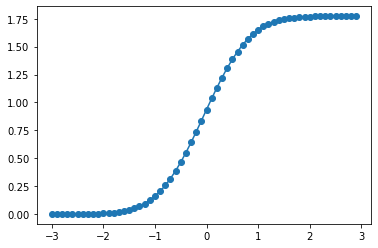

In [9]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt

def fx(x):
    return np.exp(-x**2)

#list for integral values
gvals=[]

#constant offset (would need to obtain for particular problem).
g=0
dx=0.1

xvals=np.arange(-3,3,dx)
for x in xvals:
    g=g+fx(x)*dx
    gvals=gvals+[g]

plt.plot(xvals, gvals, "-o")
                   
#save the figure file as a png image
plt.savefig("integral.png")
plt.show()
### END SOLUTION

[Click here for some final hints!](solutions/sol1004.ipynb)

* Test your `gvals` array has the correct values below:

In [11]:
import sys
sys.path.append(".checks")
import check10

if gvals==check10.gvals: print("The data passes the test! (But check there are no remaining errors)")
else: print(f"Oops! gvals covers the wrong range of values. Try looking at the x-axis and your x values...")

The data passes the test! (But check there are no remaining errors)



---

## Appendix

### Practical Application of the above example: Integration using a Cumulative Sum

Some functions are impossible to integrate analytically such as: 
    $$\displaystyle g(x) = \int \mathrm{e}^{-x^2} \mathrm{d}x.$$ (Try this: you will end up going round in circles!)

* We can Numerically Integrate $g(x)$ using:
$$\int\limits_a^b f(x) \mathrm{d}x \approx g_0 + \sum\limits_{x=a}^{b} f(x) \delta x,$$
with from some *initial* $g_0$ (given by the particular application).
* In this case it is just the *sum of small areas* under $f(x)$, similar to the trapezium rule (or a cumulative sum).

### Exercise: Comment the code above so you understand what all the steps are doing.